In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# 先了解一波数据
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [3]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
train.shape

(1460, 81)

In [5]:
test.shape

(1459, 80)

In [6]:
train.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
train.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [9]:
import seaborn as sb

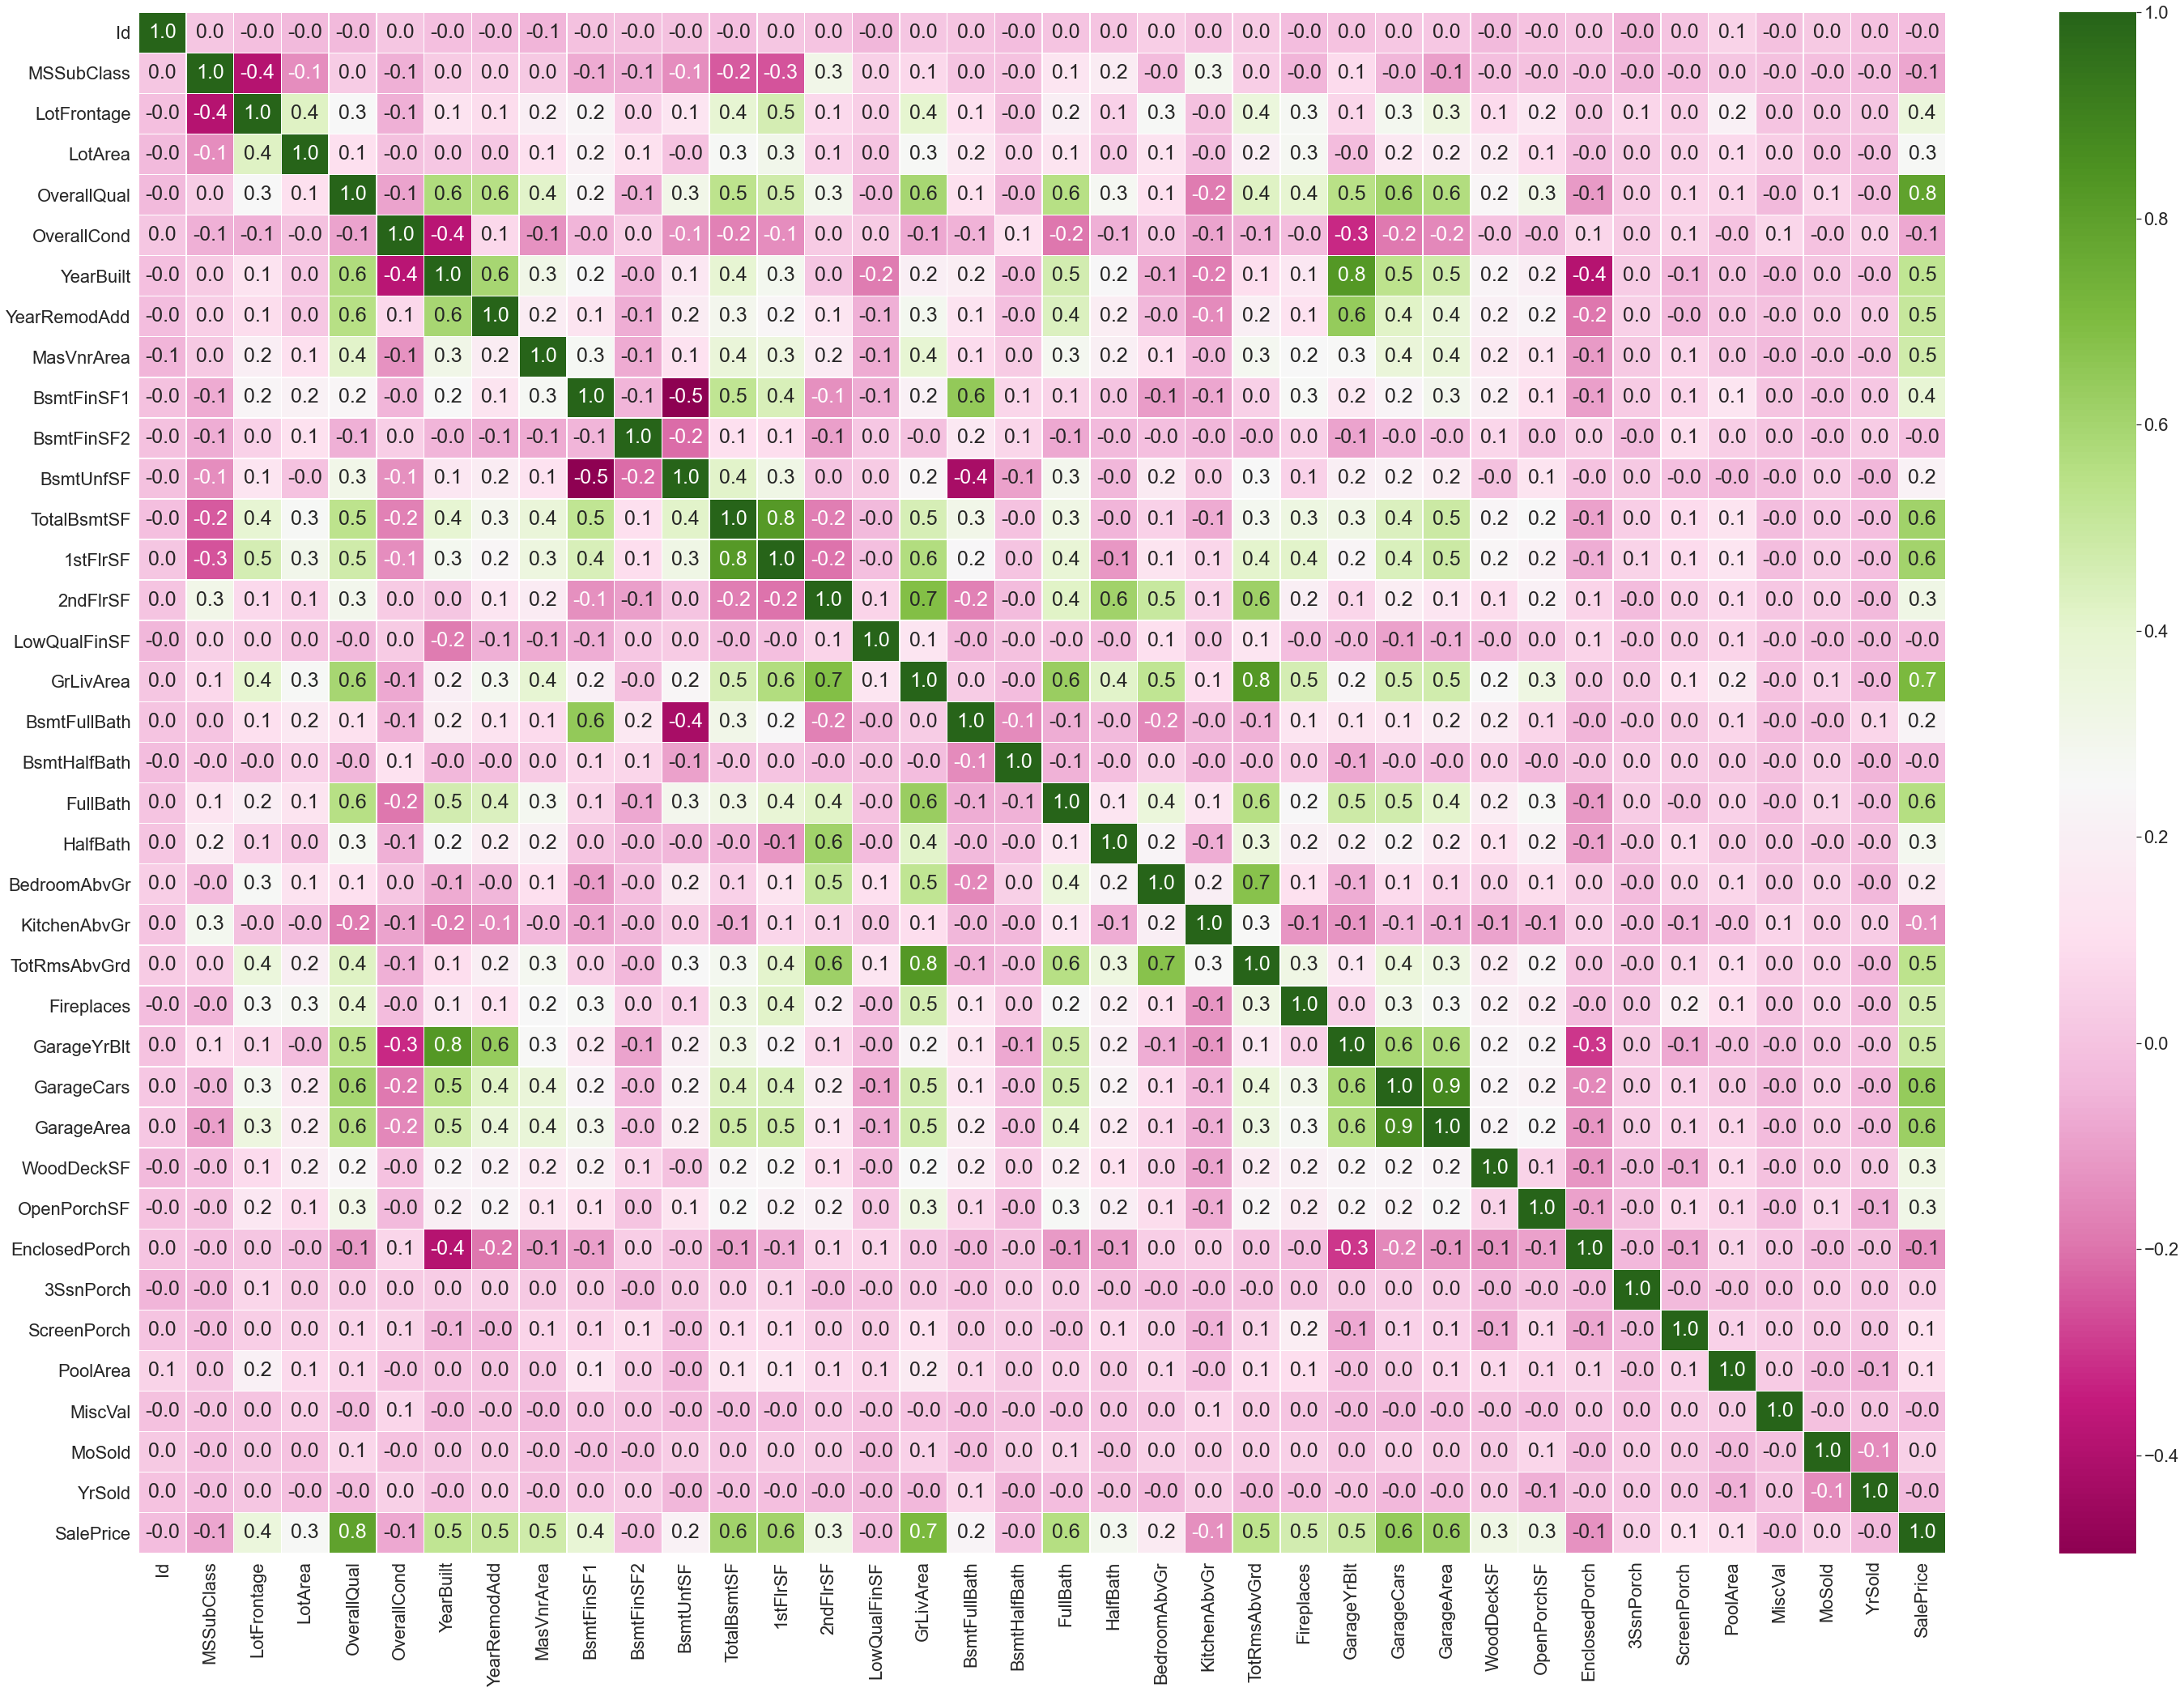

In [10]:
correlation_train = train.corr()
sb.set(font_scale=2)
plt.figure(figsize=(50,35))
ax = sb.heatmap(correlation_train, annot=True,annot_kws={"size":25}, fmt=".1f", cmap="PiYG", linewidths=.5)

In [11]:
correlation_train.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [12]:
correlation_train['SalePrice']

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

In [13]:
corr_dict = correlation_train['SalePrice'].sort_values(ascending=False).to_dict() # ascending:False:降序

In [14]:
corr_dict

{'SalePrice': 1.0,
 'OverallQual': 0.7909816005838047,
 'GrLivArea': 0.7086244776126511,
 'GarageCars': 0.640409197258349,
 'GarageArea': 0.6234314389183598,
 'TotalBsmtSF': 0.6135805515591944,
 '1stFlrSF': 0.6058521846919166,
 'FullBath': 0.5606637627484452,
 'TotRmsAbvGrd': 0.5337231555820238,
 'YearBuilt': 0.5228973328794967,
 'YearRemodAdd': 0.5071009671113867,
 'GarageYrBlt': 0.48636167748786213,
 'MasVnrArea': 0.4774930470957107,
 'Fireplaces': 0.4669288367515242,
 'BsmtFinSF1': 0.38641980624215627,
 'LotFrontage': 0.35179909657067854,
 'WoodDeckSF': 0.32441344456813076,
 '2ndFlrSF': 0.31933380283206614,
 'OpenPorchSF': 0.31585622711605577,
 'HalfBath': 0.2841076755947784,
 'LotArea': 0.2638433538714063,
 'BsmtFullBath': 0.22712223313149718,
 'BsmtUnfSF': 0.214479105546969,
 'BedroomAbvGr': 0.1682131543007415,
 'ScreenPorch': 0.11144657114291048,
 'PoolArea': 0.09240354949187278,
 'MoSold': 0.04643224522381936,
 '3SsnPorch': 0.04458366533574792,
 'BsmtFinSF2': -0.0113781214502152

In [15]:
important_columns = []
for key,value in corr_dict.items():
    if((value>0.1)&(value<0.8))|(value<-0.1):
        important_columns.append(key)
important_columns

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'MasVnrArea',
 'Fireplaces',
 'BsmtFinSF1',
 'LotFrontage',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF',
 'HalfBath',
 'LotArea',
 'BsmtFullBath',
 'BsmtUnfSF',
 'BedroomAbvGr',
 'ScreenPorch',
 'EnclosedPorch',
 'KitchenAbvGr']

d:\tool\python\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\tool\python\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\tool\python\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\tool\python\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\tool\python\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

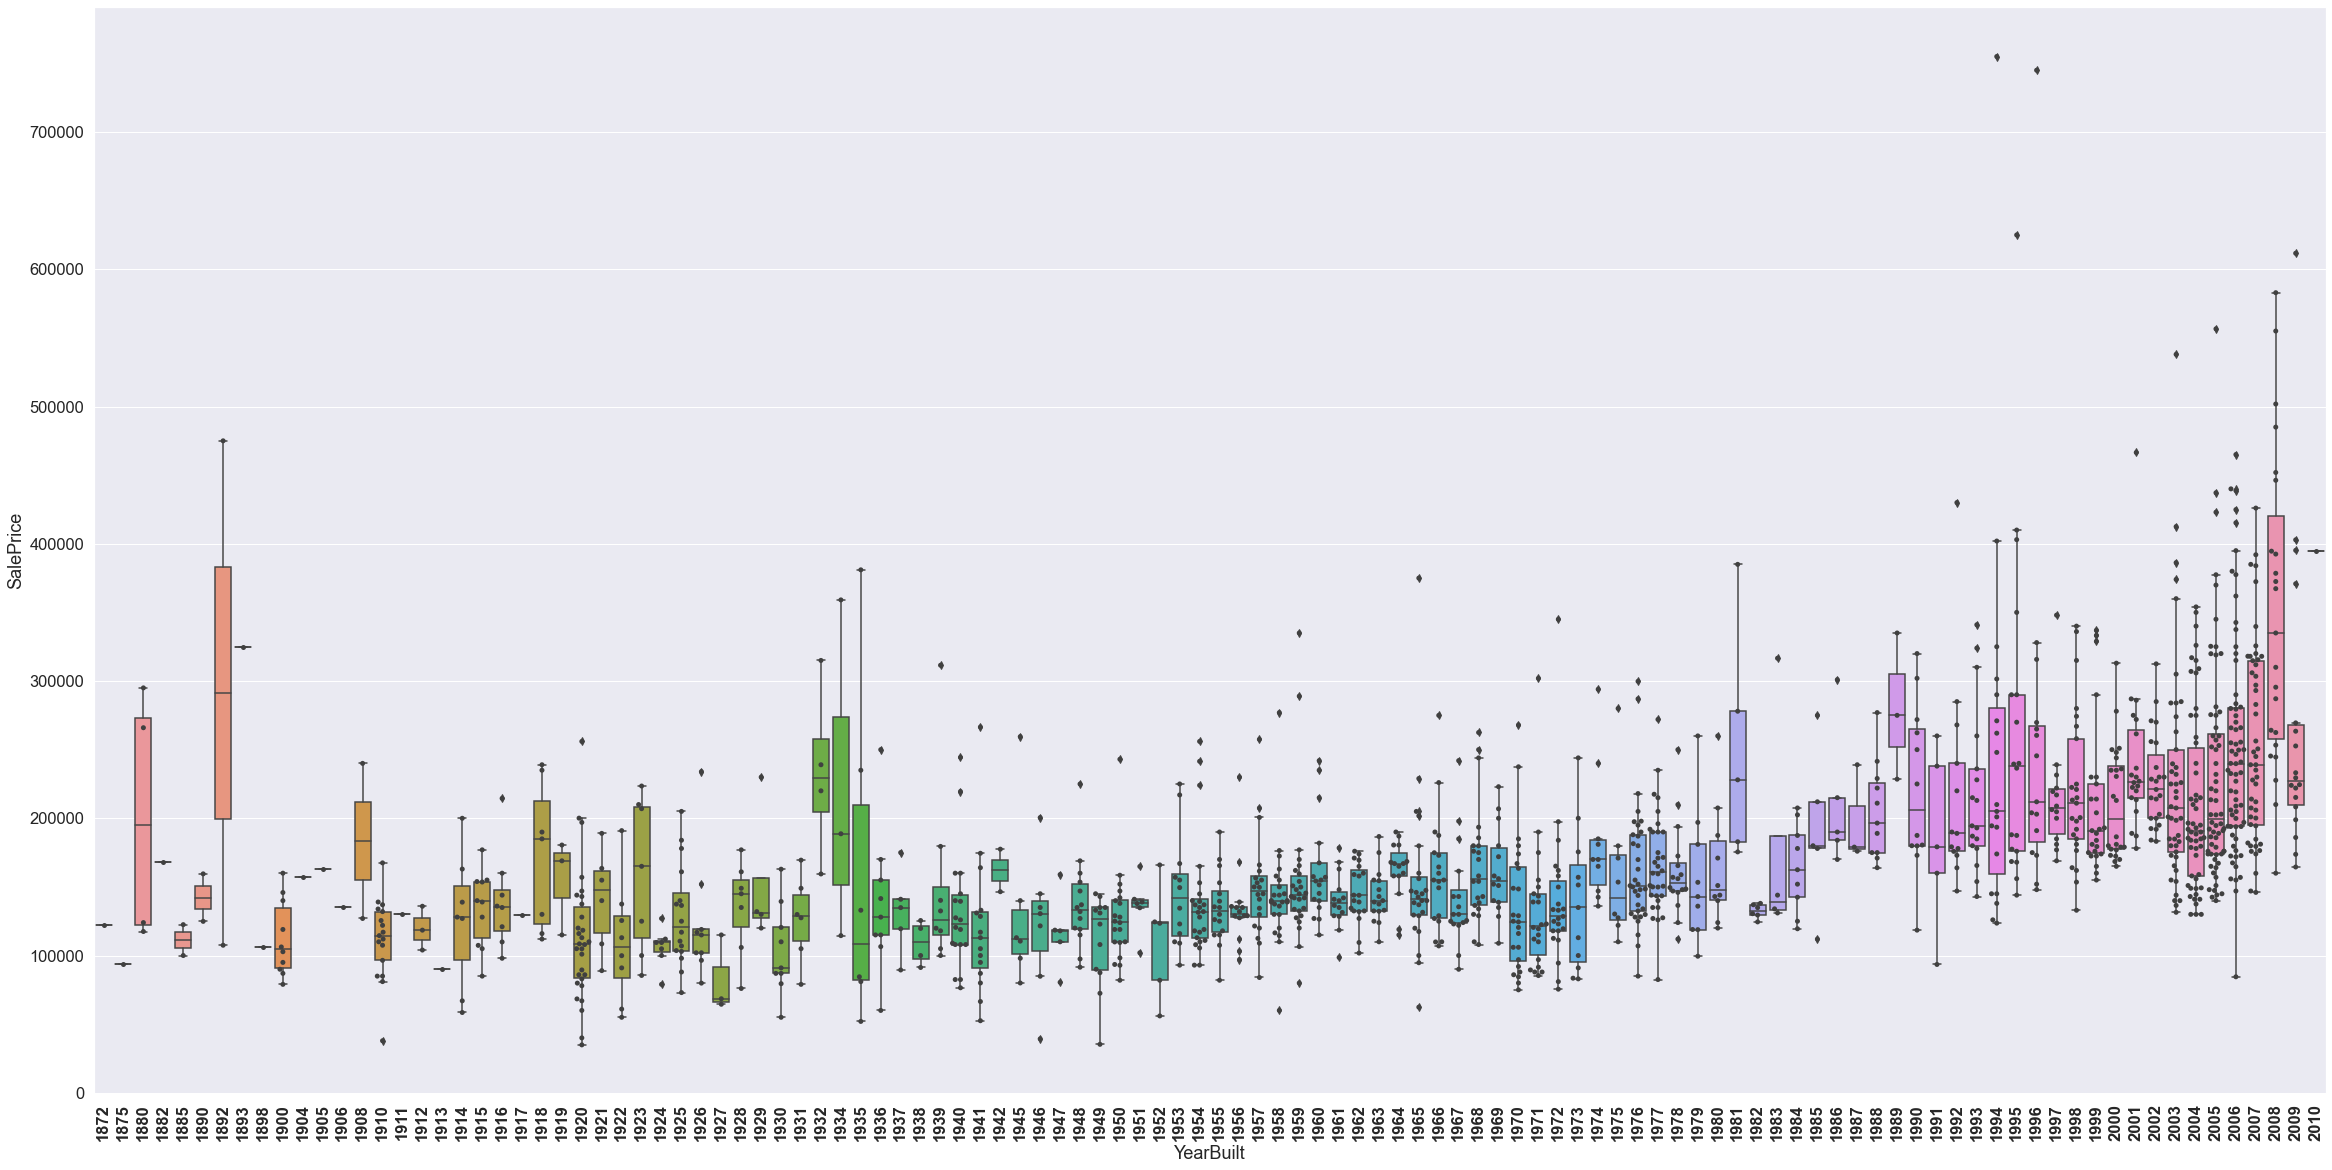

In [16]:
# 施工日期与销售价格
plt.figure(figsize=(40,20))
sb.set(font_scale=1.5)
sb.boxplot(x='YearBuilt', y='SalePrice', data=train) # 箱图
sb.swarmplot(x='YearBuilt', y='SalePrice', data=train, color=".25") # 散点图
plt.xticks(weight='bold', rotation=90)

In [17]:
# 测试集
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [18]:
test.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
1454         Lvl    AllPub  ...           0        0    NaN    NaN   
1455         Lvl    AllPub  ...           0        0    NaN    NaN   
1456         Lvl    AllPub  ...           0        0    NaN    NaN   
1457         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[5 rows x 80 columns]

In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [20]:
test.describe().T

count         mean          std     min      25%     50%  \
Id             1459.0  2190.000000   421.321334  1461.0  1825.50  2190.0   
MSSubClass     1459.0    57.378341    42.746880    20.0    20.00    50.0   
LotFrontage    1232.0    68.580357    22.376841    21.0    58.00    67.0   
LotArea        1459.0  9819.161069  4955.517327  1470.0  7391.00  9399.0   
OverallQual    1459.0     6.078821     1.436812     1.0     5.00     6.0   
OverallCond    1459.0     5.553804     1.113740     1.0     5.00     5.0   
YearBuilt      1459.0  1971.357779    30.390071  1879.0  1953.00  1973.0   
YearRemodAdd   1459.0  1983.662783    21.130467  1950.0  1963.00  1992.0   
MasVnrArea     1444.0   100.709141   177.625900     0.0     0.00     0.0   
BsmtFinSF1     1458.0   439.203704   455.268042     0.0     0.00   350.5   
BsmtFinSF2     1458.0    52.619342   176.753926     0.0     0.00     0.0   
BsmtUnfSF      1458.0   554.294925   437.260486     0.0   219.25   460.0   
TotalBsmtSF    1458.0  1046.117970   442.898624     0.0   784.00   988.0   
1stFlrSF       1459.0  1156.534613   398.165820   407.0   873.50  1079.0   
2ndFlrSF       1459.0   325.967786   420.610226     0.0     0.00     0.0   
LowQualFinSF   1459.0     3.543523    44.043251     0.0     0.00     0.0   
GrLivArea      1459.0  1486.045922   485.566099   407.0  1117.50  1432.0   
BsmtFullBath   1457.0     0.434454     0.530648     0.0     0.00     0.0   
BsmtHalfBath   1457.0     0.065202     0.252468     0.0     0.00     0.0   
FullBath       1459.0     1.570939     0.555190     0.0     1.00     2.0   
HalfBath       1459.0     0.377656     0.503017     0.0     0.00     0.0   
BedroomAbvGr   1459.0     2.854010     0.829788     0.0     2.00     3.0   
KitchenAbvGr   1459.0     1.042495     0.208472     0.0     1.00     1.0   
TotRmsAbvGrd   1459.0     6.385195     1.508895     3.0     5.00     6.0   
Fireplaces     1459.0     0.581220     0.647420     0.0     0.00     0.0   
GarageYrBlt    1381.0  1977.721217    26.431175  1895.0  1959.00  1979.0   
GarageCars     1458.0     1.766118     0.775945     0.0     1.00     2.0   
GarageArea     1458.0   472.768861   217.048611     0.0   318.00   480.0   
WoodDeckSF     1459.0    93.174777   127.744882     0.0     0.00     0.0   
OpenPorchSF    1459.0    48.313914    68.883364     0.0     0.00    28.0   
EnclosedPorch  1459.0    24.243317    67.227765     0.0     0.00     0.0   
3SsnPorch      1459.0     1.794380    20.207842     0.0     0.00     0.0   
ScreenPorch    1459.0    17.064428    56.609763     0.0     0.00     0.0   
PoolArea       1459.0     1.744345    30.491646     0.0     0.00     0.0   
MiscVal        1459.0    58.167923   630.806978     0.0     0.00     0.0   
MoSold         1459.0     6.104181     2.722432     1.0     4.00     6.0   
YrSold         1459.0  2007.769705     1.301740  2006.0  2007.00  2008.0   

                    75%      max  
Id              2554.50   2919.0  
MSSubClass        70.00    190.0  
LotFrontage       80.00    200.0  
LotArea        11517.50  56600.0  
OverallQual        7.00     10.0  
OverallCond        6.00      9.0  
YearBuilt       2001.00   2010.0  
YearRemodAdd    2004.00   2010.0  
MasVnrArea       164.00   1290.0  
BsmtFinSF1       753.50   4010.0  
BsmtFinSF2         0.00   1526.0  
BsmtUnfSF        797.75   2140.0  
TotalBsmtSF     1305.00   5095.0  
1stFlrSF        1382.50   5095.0  
2ndFlrSF         676.00   1862.0  
LowQualFinSF       0.00   1064.0  
GrLivArea       1721.00   5095.0  
BsmtFullBath       1.00      3.0  
BsmtHalfBath       0.00      2.0  
FullBath           2.00      4.0  
HalfBath           1.00      2.0  
BedroomAbvGr       3.00      6.0  
KitchenAbvGr       1.00      2.0  
TotRmsAbvGrd       7.00     15.0  
Fireplaces         1.00      4.0  
GarageYrBlt     2002.00   2207.0  
GarageCars         2.00      5.0  
GarageArea       576.00   1488.0  
WoodDeckSF       168.00   1424.0  
OpenPorchSF       72.00    742.0  
EnclosedPorch      0.00   1012.0  
3SsnPor

In [21]:
# 对数据进行处理
train_test = pd.concat([train,test], axis=0,sort=False)
train_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1454         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal   208500.0  
1         5   2007        WD         Normal   181500.0  
2         9   2008        WD         Normal   223500.0  
3         2   2006        WD        Abnorml   140000.0  
4        12   2008        WD         Normal   250000.0  
...     ...    ...       ...            ...        ...  
1454      6   2006        WD         Normal        NaN  
1455      4   2006        WD        Abnorml        NaN  
1456      9   2006        WD        Abnorml        NaN  
1457      7   2006        WD         Normal        NaN  
1458     11   2006        WD         Normal        NaN  

[2919 rows x 81 columns]

In [22]:
pd.set_option('display.max_rows', 5000) # 无论数据有多少最后最多显示5000行

In [23]:
# 缺失值数量以及其数据类型
train_test_null_info = pd.DataFrame(train_test.isnull().sum(), columns=['Count of NaN'])
train_test_dtype_info = pd.DataFrame(train_test.dtypes, columns=['DataTypes'])
train_test_info = pd.concat([train_test_null_info,train_test_dtype_info],axis=1)
train_test_info

Count of NaN DataTypes
Id                        0     int64
MSSubClass                0     int64
MSZoning                  4    object
LotFrontage             486   float64
LotArea                   0     int64
Street                    0    object
Alley                  2721    object
LotShape                  0    object
LandContour               0    object
Utilities                 2    object
LotConfig                 0    object
LandSlope                 0    object
Neighborhood              0    object
Condition1                0    object
Condition2                0    object
BldgType                  0    object
HouseStyle                0    object
OverallQual               0     int64
OverallCond               0     int64
YearBuilt                 0     int64
YearRemodAdd              0     int64
RoofStyle                 0    object
RoofMatl                  0    object
Exterior1st               1    object
Exterior2nd               1    object
MasVnrType               24    object
MasVnrArea               23   float64
ExterQual                 0    object
ExterCond                 0    object
Foundation                0    object
BsmtQual                 81    object
BsmtCond                 82    object
BsmtExposure             82    object
BsmtFinType1             79    object
BsmtFinSF1                1   float64
BsmtFinType2             80    object
BsmtFinSF2                1   float64
BsmtUnfSF                 1   float64
TotalBsmtSF               1   float64
Heating                   0    object
HeatingQC                 0    object
CentralAir                0    object
Electrical                1    object
1stFlrSF                  0     int64
2ndFlrSF                  0     int64
LowQualFinSF              0     int64
GrLivArea                 0     int64
BsmtFullBath              2   float64
BsmtHalfBath              2   float64
FullBath                  0     int64
HalfBath                  0     int64
BedroomAbvGr              0     int64
KitchenAbvGr              0     int64
KitchenQual               1    object
TotRmsAbvGrd              0     int64
Functional                2    object
Fireplaces                0     int64
FireplaceQu            1420    object
GarageType              157    object
GarageYrBlt             159   float64
GarageFinish            159    object
GarageCars                1   float64
GarageArea                1   float64
GarageQual              159    object
GarageCond              159    object
PavedDrive                0    object
WoodDeckSF                0     int64
OpenPorchSF               0     int64
EnclosedPorch             0     int64
3SsnPorch                 0     int64
ScreenPorch               0     int64
PoolArea                  0     int64
PoolQC                 2909    object
Fence                  2348    object
MiscFeature            2814    object
MiscVal                   0     int64
MoSold                    0     int64
YrSold                    0     int64
SaleType                  1    object
SaleCondition             0    object
SalePrice              1459   float64

In [24]:
train_test['FireplaceQu']

0       NaN
1        TA
2        TA
3        Gd
4        TA
5       NaN
6        Gd
7        TA
8        TA
9        TA
10      NaN
11       Gd
12      NaN
13       Gd
14       Fa
15      NaN
16       TA
17      NaN
18      NaN
19      NaN
20       Gd
21       Gd
22       Gd
23       TA
24       TA
25       Gd
26      NaN
27       Gd
28       Gd
29      NaN
30      NaN
31      NaN
32      NaN
33       Gd
34       Gd
35       Gd
36      NaN
37       TA
38      NaN
39      NaN
40       TA
41       Gd
42      NaN
43      NaN
44      NaN
45       Gd
46       Ex
47      NaN
48      NaN
49      NaN
50      NaN
51       Gd
52      NaN
53       Gd
54       TA
55       Gd
56      NaN
57      NaN
58       Gd
59      NaN
60      NaN
61      NaN
62       Gd
63      NaN
64      NaN
65       Gd
66       Gd
67      NaN
68      NaN
69       TA
70       Gd
71      NaN
72       TA
73      NaN
74      NaN
75      NaN
76      NaN
77      NaN
78      NaN
79      NaN
80       Gd
81      NaN
82       Gd
83  

In [25]:
train_test['Fireplaces']

0       0
1       1
2       1
3       1
4       1
5       0
6       1
7       2
8       2
9       2
10      0
11      2
12      0
13      1
14      1
15      0
16      1
17      0
18      0
19      0
20      1
21      1
22      1
23      1
24      1
25      1
26      0
27      1
28      2
29      0
30      0
31      0
32      0
33      1
34      1
35      1
36      0
37      1
38      0
39      0
40      1
41      2
42      0
43      0
44      0
45      1
46      1
47      0
48      0
49      0
50      0
51      1
52      0
53      1
54      1
55      1
56      0
57      0
58      1
59      0
60      0
61      0
62      1
63      0
64      0
65      1
66      1
67      0
68      0
69      1
70      2
71      0
72      1
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      1
81      0
82      1
83      0
84      1
85      1
86      1
87      0
88      0
89      0
90      0
91      0
92      0
93      1
94      0
95      1
96      0
97      0
98      0
99      0


In [26]:
# 缺失值改为Nothing
train_test.loc[train_test['Fireplaces']==0,'FireplaceQu']='Nothing'

In [27]:
train_test.groupby('1stFlrSF')['LotFrontage'].transform('mean')

0        66.500000
1        82.333333
2        90.000000
3        56.333333
4        56.250000
5        60.375000
6        80.750000
7        70.000000
8        55.666667
9        56.666667
10       67.545455
11       89.666667
12       71.071429
13       62.833333
14       63.000000
15       67.500000
16       67.000000
17       66.333333
18       67.428571
19       60.000000
20       78.000000
21       76.500000
22       75.000000
23       51.333333
24       51.333333
25       94.000000
26       58.250000
27       98.000000
28       94.000000
29       38.000000
30       50.000000
31       40.000000
32       89.000000
33       60.666667
34       75.000000
35       84.000000
36       87.666667
37       74.000000
38       69.333333
39       76.500000
40       68.800000
41       81.666667
42       63.285714
43       50.000000
44       73.333333
45       61.000000
46       71.250000
47      104.000000
48       46.000000
49       74.800000
50             NaN
51       64.187500
52       64.

In [28]:
train_test['LotFrontage']

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
5        85.0
6        75.0
7         NaN
8        51.0
9        50.0
10       70.0
11       85.0
12        NaN
13       91.0
14        NaN
15       51.0
16        NaN
17       72.0
18       66.0
19       70.0
20      101.0
21       57.0
22       75.0
23       44.0
24        NaN
25      110.0
26       60.0
27       98.0
28       47.0
29       60.0
30       50.0
31        NaN
32       85.0
33       70.0
34       60.0
35      108.0
36      112.0
37       74.0
38       68.0
39       65.0
40       84.0
41      115.0
42        NaN
43        NaN
44       70.0
45       61.0
46       48.0
47       84.0
48       33.0
49       66.0
50        NaN
51       52.0
52      110.0
53       68.0
54       60.0
55      100.0
56       24.0
57       89.0
58       66.0
59       60.0
60       63.0
61       60.0
62       44.0
63       50.0
64        NaN
65       76.0
66        NaN
67       72.0
68       47.0
69       81.0
70       95.0
71    

In [29]:
# 根据一楼平方英尺分组，然后计算平均值来填充与物业的距离
train_test['LotFrontage'] = train_test['LotFrontage'].fillna(train_test.groupby('1stFlrSF')['LotFrontage'].transform('mean'))

In [30]:
train_test['LotFrontage']

0        65.000000
1        80.000000
2        68.000000
3        60.000000
4        84.000000
5        85.000000
6        75.000000
7        70.000000
8        51.000000
9        50.000000
10       70.000000
11       85.000000
12       71.071429
13       91.000000
14       63.000000
15       51.000000
16       67.000000
17       72.000000
18       66.000000
19       70.000000
20      101.000000
21       57.000000
22       75.000000
23       44.000000
24       51.333333
25      110.000000
26       60.000000
27       98.000000
28       47.000000
29       60.000000
30       50.000000
31       40.000000
32       85.000000
33       70.000000
34       60.000000
35      108.000000
36      112.000000
37       74.000000
38       68.000000
39       65.000000
40       84.000000
41      115.000000
42       63.285714
43       50.000000
44       70.000000
45       61.000000
46       48.000000
47       84.000000
48       33.000000
49       66.000000
50             NaN
51       52.000000
52      110.

In [31]:
train_test['LotFrontage'].interpolate(method='linear',inplace=True) # 利用线性插值填充
train_test['LotFrontage'] = train_test['LotFrontage'].astype(int)

In [32]:
train_test['LotFrontage']

0        65
1        80
2        68
3        60
4        84
5        85
6        75
7        70
8        51
9        50
10       70
11       85
12       71
13       91
14       63
15       51
16       67
17       72
18       66
19       70
20      101
21       57
22       75
23       44
24       51
25      110
26       60
27       98
28       47
29       60
30       50
31       40
32       85
33       70
34       60
35      108
36      112
37       74
38       68
39       65
40       84
41      115
42       63
43       50
44       70
45       61
46       48
47       84
48       33
49       66
50       59
51       52
52      110
53       68
54       60
55      100
56       24
57       89
58       66
59       60
60       63
61       60
62       44
63       50
64       69
65       76
66       74
67       72
68       47
69       81
70       95
71       69
72       74
73       85
74       60
75       21
76       61
77       50
78       72
79       60
80      100
81       32
82       78
83  

In [33]:
# 根据砌体饰面类型来计算均值然后填充砌体饰面面积
train_test['MasVnrArea'] = train_test['MasVnrArea'].fillna(train_test.groupby('MasVnrType')['MasVnrArea'].transform('mean'))
train_test['MasVnrArea'].interpolate(method='linear',inplace=True)
train_test['MasVnrArea']=train_test['MasVnrArea'].astype(int)

In [34]:
train_test['MasVnrArea']

0        196
1          0
2        162
3          0
4        350
5          0
6        186
7        240
8          0
9          0
10         0
11       286
12         0
13       306
14       212
15         0
16       180
17         0
18         0
19         0
20       380
21         0
22       281
23         0
24         0
25       640
26         0
27       200
28         0
29         0
30         0
31         0
32         0
33         0
34       246
35       132
36         0
37       650
38         0
39         0
40       101
41         0
42         0
43         0
44         0
45       412
46         0
47         0
48         0
49         0
50         0
51         0
52         0
53         0
54         0
55       272
56       456
57         0
58      1031
59         0
60         0
61         0
62       178
63         0
64       573
65       344
66       287
67       167
68         0
69         0
70      1115
71         0
72        40
73       104
74         0
75         0
76         0

In [35]:
# 围栏质量将空值替换为None
train_test["Fence"] = train_test["Fence"].fillna("None")

In [36]:
train_test["Fence"] 

0        None
1        None
2        None
3        None
4        None
5       MnPrv
6        None
7        None
8        None
9        None
10       None
11       None
12       None
13       None
14       GdWo
15      GdPrv
16       None
17       None
18       None
19      MnPrv
20       None
21      GdPrv
22       None
23       None
24      MnPrv
25       None
26       None
27       None
28       None
29       None
30      MnPrv
31      MnPrv
32       None
33       None
34       None
35       None
36       None
37       None
38       None
39       None
40       GdWo
41       None
42      MnPrv
43      MnPrv
44       None
45       None
46       None
47       None
48       None
49      MnPrv
50       None
51      MnPrv
52       None
53       None
54      MnPrv
55       None
56       None
57       None
58       None
59      MnPrv
60       None
61       None
62       None
63      GdPrv
64      GdPrv
65       None
66       None
67       None
68       None
69       None
70       None
71    

In [37]:
# train_test["FireplaceQu"] = train_test["FireplaceQu"].fillna("None")

In [38]:
# 物业通道类型
train_test["Alley"] = train_test["Alley"].fillna("None")
# 泳池质量
train_test["PoolQC"] = train_test["PoolQC"].fillna("None")
# 其他类别中未涵盖的杂项功能
train_test["MiscFeature"] = train_test["MiscFeature"].fillna("None")

In [39]:
# 地下室
train_test.loc[train_test['BsmtFinSF1']==0,'BsmtFinType1']='Unf'
train_test.loc[train_test['BsmtFinSF2']==0,'BsmtQual']='TA'

In [40]:
# 施工日期+改造日期
train_test['YrBltRmd']=train_test['YearBuilt']+train_test['YearRemodAdd']

In [41]:
# 地下室
train_test['Total_Square_Feet'] = (train_test['BsmtFinSF1'] + train_test['BsmtFinSF2'] + train_test['1stFlrSF'] + train_test['2ndFlrSF'] + train_test['TotalBsmtSF'])

In [42]:
# 浴室
train_test['Total_Bath'] = (train_test['FullBath'] + (0.5 * train_test['HalfBath']) + train_test['BsmtFullBath'] + (0.5 * train_test['BsmtHalfBath']))

In [43]:
# 门廊
train_test['Total_Porch_Area'] = (train_test['OpenPorchSF'] + train_test['3SsnPorch'] + train_test['EnclosedPorch'] + train_test['ScreenPorch'] + train_test['WoodDeckSF'])

In [44]:
# 游泳池
train_test['exists_pool'] = train_test['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

In [45]:
# 车库
train_test['exists_garage'] = train_test['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

In [46]:
# 壁炉
train_test['exists_fireplace'] = train_test['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [47]:
# 地下室
train_test['exists_bsmt'] = train_test['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

In [48]:
# 是否是老房子
train_test['old_house'] = train_test['YearBuilt'].apply(lambda x: 1 if x <1990 else 0)

In [49]:
train_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [50]:
for i in train_test.columns:
    if 'SalePrice' not in i:
        if 'object' in str(train_test[i].dtype):
            train_test[i]=train_test[i].fillna(method='ffill')

In [51]:
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder,PowerTransformer

In [52]:
# 编码
columns = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 'YrSold', 'MoSold', 'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope', 'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond')
for col in columns:
    lbl_enc = LabelEncoder() 
    lbl_enc.fit(list(train_test[col].values)) 
    train_test[col] = lbl_enc.transform(list(train_test[col].values))

In [53]:
train_test.dtypes

Id                     int64
MSSubClass             int64
MSZoning              object
LotFrontage            int32
LotArea                int64
Street                 int64
Alley                  int64
LotShape               int64
LandContour           object
Utilities             object
LotConfig             object
LandSlope              int64
Neighborhood          object
Condition1            object
Condition2            object
BldgType              object
HouseStyle            object
OverallQual            int64
OverallCond            int64
YearBuilt              int64
YearRemodAdd           int64
RoofStyle             object
RoofMatl              object
Exterior1st           object
Exterior2nd           object
MasVnrType            object
MasVnrArea             int32
ExterQual              int64
ExterCond              int64
Foundation            object
BsmtQual               int64
BsmtCond               int64
BsmtExposure           int64
BsmtFinType1           int64
BsmtFinSF1    

In [54]:
from scipy.stats import skew # 计算偏度

In [55]:
numeric_features = train_test.dtypes[train_test.dtypes != "object"].index

In [56]:
skewed_features = train_test[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)

In [57]:
skewed_features

MiscVal              21.947195
PoolArea             16.898328
exists_pool          14.884318
LotArea              12.822431
LowQualFinSF         12.088761
3SsnPorch            11.376065
LandSlope             4.975157
KitchenAbvGr          4.302254
EnclosedPorch         4.003891
ScreenPorch           3.946694
MasVnrArea            2.600375
OpenPorchSF           2.535114
WoodDeckSF            1.842433
LotFrontage           1.483631
1stFlrSF              1.469604
Total_Porch_Area      1.376649
GrLivArea             1.269358
2ndFlrSF              0.861675
TotRmsAbvGrd          0.758367
MSSubClass            0.738722
Fireplaces            0.733495
HalfBath              0.694566
OverallCond           0.570312
HeatingQC             0.486656
FireplaceQu           0.333787
BedroomAbvGr          0.326324
OverallQual           0.197110
MoSold                0.195884
FullBath              0.167606
YrSold                0.132399
Id                    0.000000
exists_fireplace     -0.054148
BsmtFinT

In [58]:
# 高偏态特征
high_skewness = skewed_features[abs(skewed_features) > 0.9]
skewed_features = high_skewness.index

In [59]:
skewed_features

Index(['MiscVal', 'PoolArea', 'exists_pool', 'LotArea', 'LowQualFinSF',
       '3SsnPorch', 'LandSlope', 'KitchenAbvGr', 'EnclosedPorch',
       'ScreenPorch', 'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF', 'LotFrontage',
       '1stFlrSF', 'Total_Porch_Area', 'GrLivArea', 'BsmtExposure',
       'KitchenQual', 'ExterQual', 'Fence', 'ExterCond', 'PavedDrive',
       'BsmtCond', 'BsmtFinType2', 'CentralAir', 'GarageQual', 'exists_garage',
       'Functional', 'GarageCond', 'exists_bsmt', 'BsmtQual', 'Street',
       'PoolQC'],
      dtype='object')

In [60]:
from scipy.special import boxcox1p # 用来将数据转换为正态分布的
from scipy.stats import boxcox_normmax  # 用来找上边这个函数的lambda的值

In [61]:
for feature in skewed_features:
    train_test[feature] = boxcox1p(train_test[feature], boxcox_normmax(train_test[feature] + 1))

d:\tool\python\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
d:\tool\python\lib\site-packages\scipy\stats\stats.py:3875: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


In [62]:
# 独立热编码
train_test=pd.get_dummies(train_test,dtype='int8')

In [63]:
# 缺失值的个数
train_test_null_info=pd.DataFrame(train_test.isnull().sum(),columns=['Count of NaN'])
train_test_dtype_info=pd.DataFrame(train_test.dtypes,columns=['DataTypes'])
train_test_info=pd.concat([train_test_null_info,train_test_dtype_info],axis=1)
train_test_info

Count of NaN DataTypes
Id                                0     int64
MSSubClass                        0     int64
LotFrontage                       0   float64
LotArea                           0   float64
Street                            0   float64
Alley                             0     int64
LotShape                          0     int64
LandSlope                         0   float64
OverallQual                       0     int64
OverallCond                       0     int64
YearBuilt                         0     int64
YearRemodAdd                      0     int64
MasVnrArea                        0   float64
ExterQual                         0   float64
ExterCond                         0   float64
BsmtQual                          0   float64
BsmtCond                          0   float64
BsmtExposure                      0   float64
BsmtFinType1                      0     int64
BsmtFinSF1                        1   float64
BsmtFinType2                      0   float64
BsmtFinSF2                        1   float64
BsmtUnfSF                         1   float64
TotalBsmtSF                       1   float64
HeatingQC                         0     int64
CentralAir                        0   float64
1stFlrSF                          0   float64
2ndFlrSF                          0     int64
LowQualFinSF                      0   float64
GrLivArea                         0   float64
BsmtFullBath                      2   float64
BsmtHalfBath                      2   float64
FullBath                          0     int64
HalfBath                          0     int64
BedroomAbvGr                      0     int64
KitchenAbvGr                      0   float64
KitchenQual                       0   float64
TotRmsAbvGrd                      0     int64
Functional                        0   float64
Fireplaces                        0     int64
FireplaceQu                       0     int64
GarageYrBlt                     159   float64
GarageFinish                      0     int64
GarageCars                        1   float64
GarageArea                        1   float64
GarageQual                        0   float64
GarageCond                        0   float64
PavedDrive                        0   float64
WoodDeckSF                        0   float64
OpenPorchSF                       0   float64
EnclosedPorch                     0   float64
3SsnPorch                         0   float64
ScreenPorch                       0   float64
PoolArea                          0   float64
PoolQC                            0   float64
Fence                             0   float64
MiscVal                           0   float64
MoSold                            0     int64
YrSold                            0     int64
SalePrice                      1459   float64
YrBltRmd                          0     int64
Total_Square_Feet                 1   float64
Total_Bath                        2   float64
Total_Porch_Area                  0   float64
exists_pool                       0   float64
exists_garage                     0   float64
exists_fireplace                  0     int64
exists_bsmt                       0   float64
old_house                         0     int64
MSZoning_C (all)                  0      int8
MSZoning_FV                       0      int8
MSZoning_RH                       0      int8
MSZoning_RL                       0      int8
MSZoning_RM                       0      int8
LandContour_Bnk                   0      int8
LandContour_HLS                   0      int8
LandContour_Low                   0      int8
LandContour_Lvl                   0      int8
Utilities_AllPub                  0      int8
Utilities_NoSeWa                  0      int8
LotConfig_Corner                  0      int8
LotConfig_CulDSac                 0      int8
LotConfig_FR2                     0      int8
LotConfig_FR3                     0      int8
LotConfig_Inside                  0      int8
Neighborhood_Blmngtn              0      int8
Neighborhood_Blueste 

In [64]:
# 将测试集和训练集分开
train=train_test[0:1460]
test=train_test[1460:2919]

In [65]:
# 用线性插值将缺失值补全
train.interpolate(method='linear',inplace=True)
test.interpolate(method='linear',inplace=True)

<ipython-input-65-91429dbd57fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.interpolate(method='linear',inplace=True)
<ipython-input-65-91429dbd57fd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.interpolate(method='linear',inplace=True)


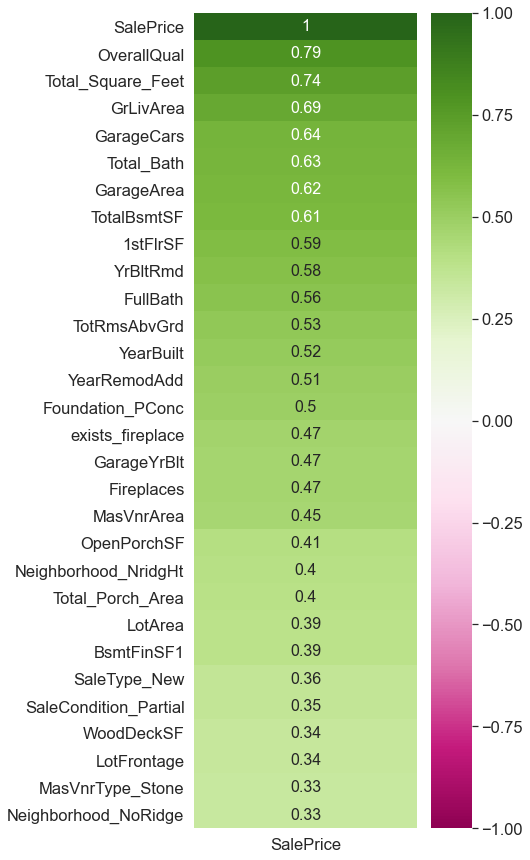

In [66]:
# 相关性
corr_new_train=train.corr()
plt.figure(figsize=(5,15))
sb.heatmap(corr_new_train[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(30)
          ,annot_kws={'size':16}
          ,vmin=-1
          ,cmap='PiYG'
          ,annot=True)
sb.set(font_scale=2)

In [67]:
corr_dict2=corr_new_train['SalePrice'].sort_values(ascending=False).to_dict()
corr_dict2

{'SalePrice': 1.0,
 'OverallQual': 0.7909816005838047,
 'Total_Square_Feet': 0.7378811939482367,
 'GrLivArea': 0.6948427961686255,
 'GarageCars': 0.640409197258349,
 'Total_Bath': 0.6317310679319897,
 'GarageArea': 0.6234314389183598,
 'TotalBsmtSF': 0.6135805515591944,
 '1stFlrSF': 0.5885261488736615,
 'YrBltRmd': 0.5761444313502854,
 'FullBath': 0.5606637627484452,
 'TotRmsAbvGrd': 0.5337231555820238,
 'YearBuilt': 0.5228973328794967,
 'YearRemodAdd': 0.5071009671113867,
 'Foundation_PConc': 0.4977337525869438,
 'exists_fireplace': 0.4719080685164922,
 'GarageYrBlt': 0.46729002276453646,
 'Fireplaces': 0.4669288367515242,
 'MasVnrArea': 0.4549307954772876,
 'OpenPorchSF': 0.40653586707998307,
 'Neighborhood_NridgHt': 0.40214859817526666,
 'Total_Porch_Area': 0.39516894227999505,
 'LotArea': 0.3906209688790543,
 'BsmtFinSF1': 0.38641980624215627,
 'SaleType_New': 0.35750940508319695,
 'SaleCondition_Partial': 0.35205985467143425,
 'WoodDeckSF': 0.3376558484054418,
 'LotFrontage': 0.33

In [68]:
# 找出与销售价格相关性比较高的特征
best_columns=[]
for key,value in corr_dict2.items():
    if ((value>=0.3175) & (value<0.9)) | (value<=-0.315):
        best_columns.append(key)
best_columns

['OverallQual',
 'Total_Square_Feet',
 'GrLivArea',
 'GarageCars',
 'Total_Bath',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'YrBltRmd',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'Foundation_PConc',
 'exists_fireplace',
 'GarageYrBlt',
 'Fireplaces',
 'MasVnrArea',
 'OpenPorchSF',
 'Neighborhood_NridgHt',
 'Total_Porch_Area',
 'LotArea',
 'BsmtFinSF1',
 'SaleType_New',
 'SaleCondition_Partial',
 'WoodDeckSF',
 'LotFrontage',
 'MasVnrType_Stone',
 'Neighborhood_NoRidge',
 '2ndFlrSF',
 'Foundation_CBlock',
 'MasVnrType_None',
 'GarageType_Detchd',
 'HeatingQC',
 'GarageFinish',
 'old_house',
 'KitchenQual',
 'ExterQual']

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38]),
 [Text(1, 0, 'OverallQual'),
  Text(2, 0, 'Total_Square_Feet'),
  Text(3, 0, 'GrLivArea'),
  Text(4, 0, 'GarageCars'),
  Text(5, 0, 'Total_Bath'),
  Text(6, 0, 'GarageArea'),
  Text(7, 0, 'TotalBsmtSF'),
  Text(8, 0, '1stFlrSF'),
  Text(9, 0, 'YrBltRmd'),
  Text(10, 0, 'FullBath'),
  Text(11, 0, 'TotRmsAbvGrd'),
  Text(12, 0, 'YearBuilt'),
  Text(13, 0, 'YearRemodAdd'),
  Text(14, 0, 'Foundation_PConc'),
  Text(15, 0, 'exists_fireplace'),
  Text(16, 0, 'GarageYrBlt'),
  Text(17, 0, 'Fireplaces'),
  Text(18, 0, 'MasVnrArea'),
  Text(19, 0, 'OpenPorchSF'),
  Text(20, 0, 'Neighborhood_NridgHt'),
  Text(21, 0, 'Total_Porch_Area'),
  Text(22, 0, 'LotArea'),
  Text(23, 0, 'BsmtFinSF1'),
  Text(24, 0, 'SaleType_New'),
  Text(25, 0, 'SaleCondition_Partial'),
  Text(26, 0, 'WoodDeckSF'),
  Text(27, 0, 'LotFrontage'),
  

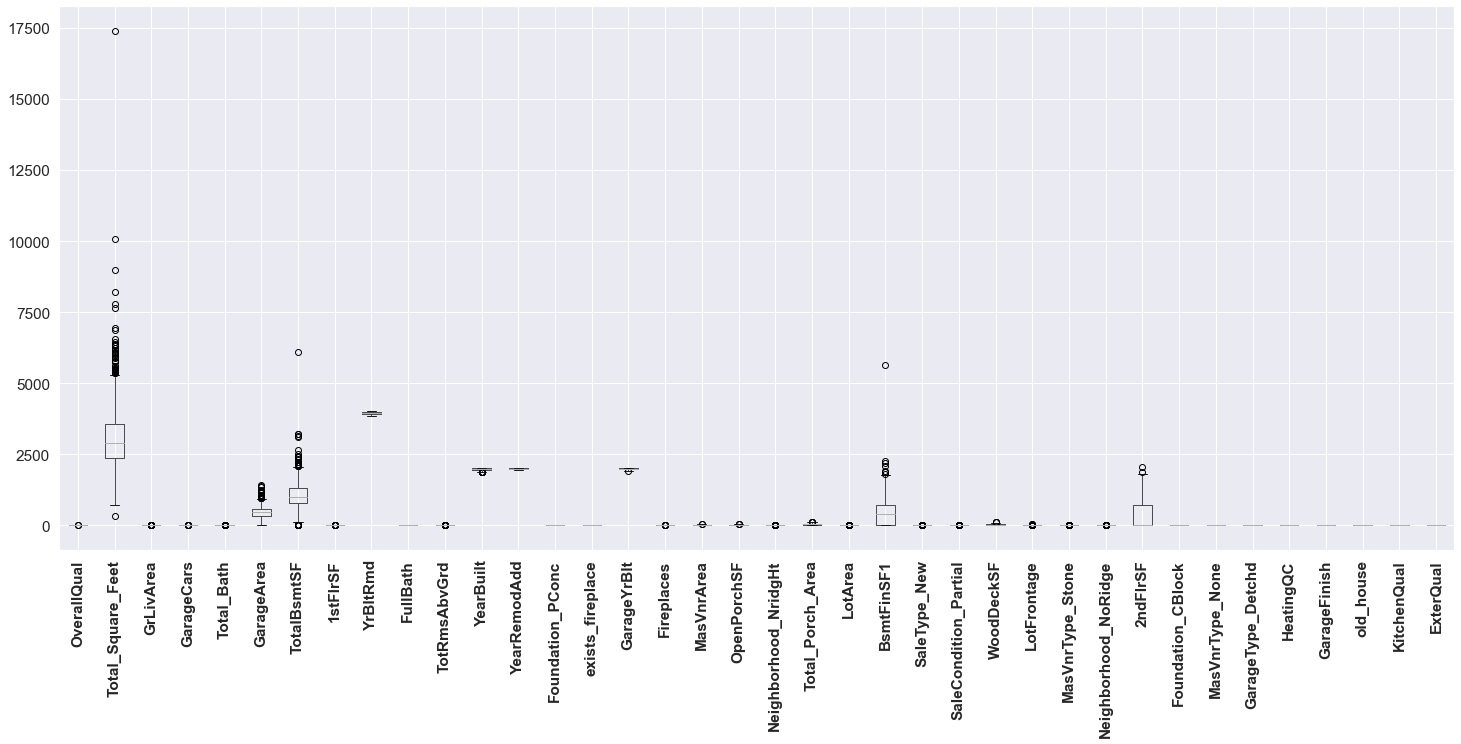

In [69]:
plt.figure(figsize=(25,10))
sb.set(font_scale=1.4)
train.boxplot(column=best_columns) # 用DataFrame创建箱图
plt.xticks(weight='bold',rotation=90)

In [70]:
train['SalePrice_Log1p'] = np.log1p(train.SalePrice)

<ipython-input-70-9182eb6d870a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['SalePrice_Log1p'] = np.log1p(train.SalePrice)


d:\tool\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skew Dist: 1.8828757597682129
Kurtosis Dist: 6.536281860064529


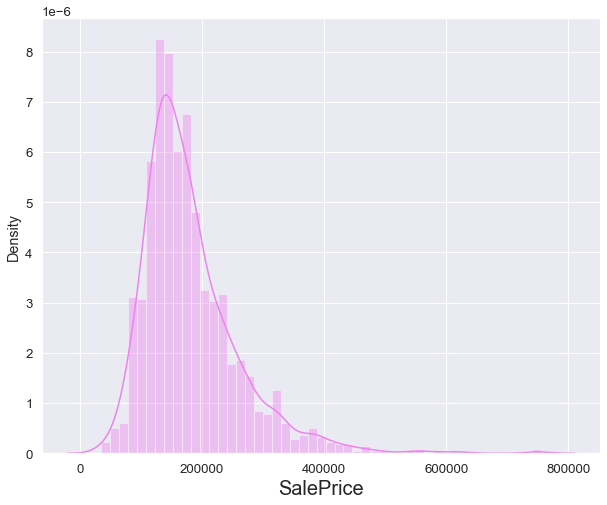

In [71]:
plt.figure(figsize=(10,8))
sb.set(font_scale=1.2)
sb.distplot(train['SalePrice'],color='violet')
plt.xlabel('SalePrice',fontsize=20)
print('Skew Dist:',train['SalePrice'].skew()) # 偏度
print('Kurtosis Dist:',train['SalePrice'].kurt()) # 峰度

Skew Dist: 0.12134661989685333
Kurtosis Dist: 0.809519155707878


d:\tool\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


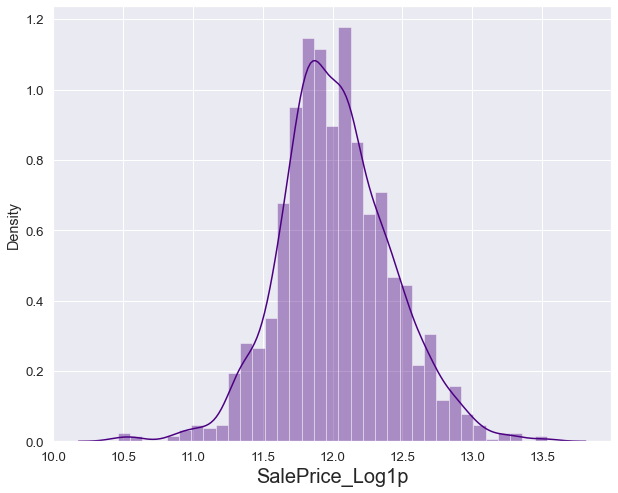

In [72]:
plt.figure(figsize=(10,8))
sb.set(font_scale=1.2)
sb.distplot(train['SalePrice_Log1p'],color='indigo')
plt.xlabel('SalePrice_Log1p',fontsize=20)
print('Skew Dist:',train['SalePrice_Log1p'].skew())
print('Kurtosis Dist:',train['SalePrice_Log1p'].kurt())

In [73]:
train.head()

Id  MSSubClass  LotFrontage    LotArea  Street  Alley  LotShape  LandSlope  \
0   1           5    13.668865  13.424522  5.2622      1         3        0.0   
1   2           0    15.311588  13.694529  5.2622      1         3        0.0   
2   3           5    14.011694  14.034135  5.2622      1         0        0.0   
3   4           6    13.079141  13.683423  5.2622      1         0        0.0   
4   5           5    15.722538  14.550144  5.2622      1         0        0.0   

   OverallQual  OverallCond  ...  SaleType_New  SaleType_Oth  SaleType_WD  \
0            7            4  ...             0             0            1   
1            6            7  ...             0             0            1   
2            7            4  ...             0             0            1   
3            7            4  ...             0             0            1   
4            8            4  ...             0             0            1   

   SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                      0                      0                     0   
1                      0                      0                     0   
2                      0                      0                     0   
3                      1                      0                     0   
4                      0                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  \
0                     0                     1                      0   
1                     0                     1                      0   
2                     0                     1                      0   
3                     0                     0                      0   
4                     0                     1                      0   

   SalePrice_Log1p  
0        12.247699  
1        12.109016  
2        12.317171  
3        11.849405  
4        12.429220  

[5 rows x 233 columns]

In [74]:
plt.style.use('ggplot')
plt.figure(figsize=(20,12))
rbst_scaler=RobustScaler() # 对异常值进行鲁棒性处理,归一化
train_rbst=rbst_scaler.fit_transform(train)

<Figure size 1440x864 with 0 Axes>

In [75]:
from sklearn.decomposition import PCA
pca=PCA(50).fit(train_rbst) # 降维

Text(0, 0.5, 'Explanined variance ratio for number of components')

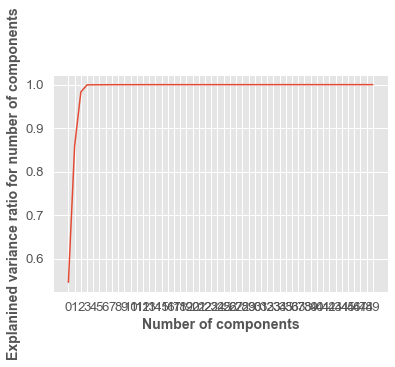

In [76]:
# .cumsum()用来计算累加和
plt.plot(pca.explained_variance_ratio_.cumsum()) # 查看降维后每个新特征向量所占的信息量占原始数据总信息量的百分比
plt.xticks(np.arange(0, 50, 1))
plt.xlabel('Number of components',fontweight='bold',size=14)
plt.ylabel('Explanined variance ratio for number of components',fontweight='bold',size=14)

In [77]:
train_pca = PCA(3).fit_transform(train_rbst) # 由上边分析可知，只需要三个特征就可以涵盖大部分的信息了

In [78]:
from sklearn.neighbors import NearestNeighbors

In [79]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(train)
distances, indices = nbrs.kneighbors(train)

In [80]:
distances

array([[   0.        , 1096.26023918],
       [   0.        , 1213.26835905],
       [   0.        , 1284.10993339],
       ...,
       [   0.        , 1192.31527806],
       [   0.        , 1607.82921485],
       [   0.        , 1331.32133725]])

In [81]:
distances = np.sort(distances, axis=0)

In [82]:
distances = distances[:,1]

In [83]:
distances

array([   48.10405388,    48.10405388,    90.064712  , ...,
       17127.23372962, 17282.6016404 , 26363.73336712])

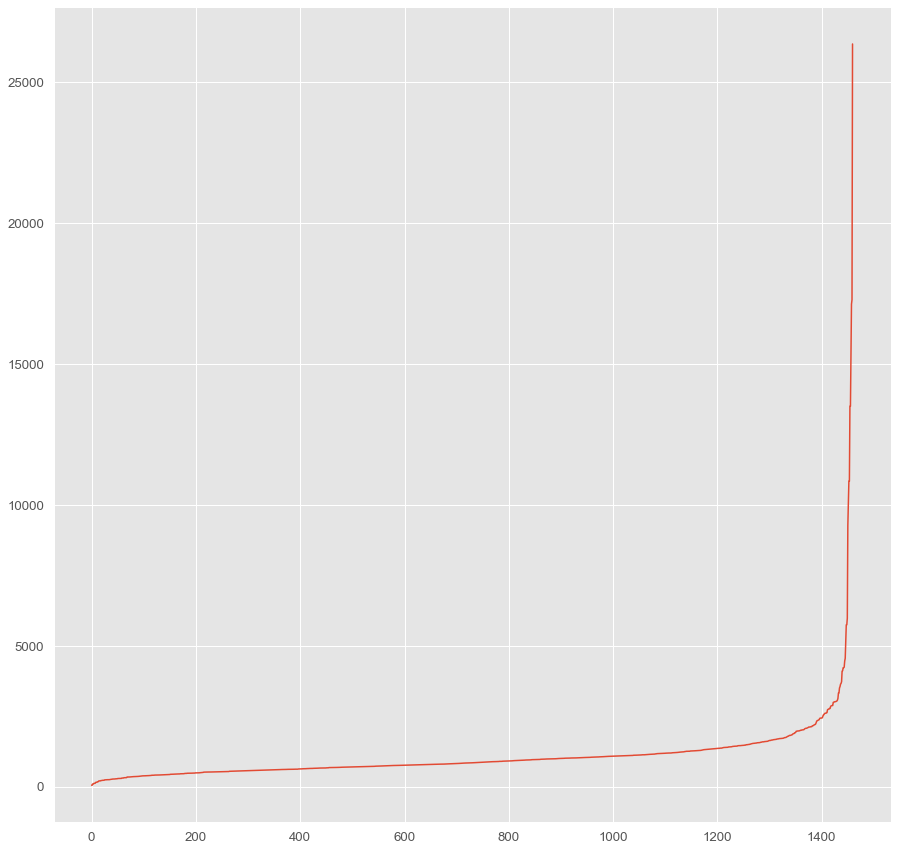

In [84]:
plt.figure(figsize=(15,15))
plt.plot(distances)

In [85]:
from sklearn.cluster import DBSCAN

In [86]:
# DBSCAN算法
dbscan = DBSCAN(eps=1400, min_samples=20).fit(train_pca)

In [87]:
len(dbscan.labels_)

1460

In [88]:
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)

In [89]:
dbscan.core_sample_indices_ # 核心点的索引

array([   0,    1,    2, ..., 1457, 1458, 1459], dtype=int64)

In [90]:
core_samples_mask[dbscan.core_sample_indices_] = True

In [91]:
labels = dbscan.labels_

In [92]:
np.unique(labels) # -1为噪声点

array([-1,  0,  1], dtype=int64)

In [93]:
import collections

In [94]:
collections.Counter(labels)

Counter({0: 1398, 1: 55, -1: 7})

In [95]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [96]:
unique_labels = set(labels)
plt.figure(figsize=(12,12))
colors = [plt.cm.prism(each)  for each in np.linspace(0, 1, len(unique_labels))]

<Figure size 864x864 with 0 Axes>

In [97]:
unique_labels

{-1, 0, 1}

In [98]:
colors

[(1.0, 0.0, 0.0, 1.0),
 (1.0, 0.8450918051812084, 0.0, 1.0),
 (0.32950712519534225, 0.99825489314128, 0.0, 1.0)]

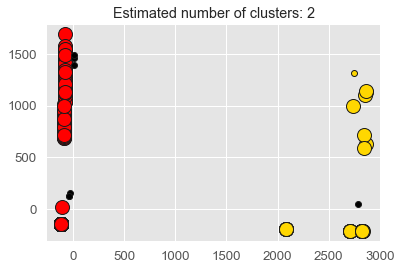

In [99]:
for k, col in zip(unique_labels,colors):
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = train_pca[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = train_pca[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [100]:
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [101]:
labels=pd.DataFrame(labels,columns=['Classes'])

In [102]:
train=pd.concat([train,labels],axis=1)

In [103]:
train[train.Classes==-1]

Id  MSSubClass  LotFrontage    LotArea  Street  Alley  LotShape  \
197    198           7    23.181522  15.851264  5.2622      1         3   
810    811           0    15.102192  13.811205  5.2622      1         3   
1170  1171           8    14.890047  13.755758  5.2622      1         3   
1182  1183           5    22.181023  14.751524  5.2622      1         0   
1298  1299           5    31.456871  18.058233  5.2622      1         2   
1386  1387           5    15.311588  14.898481  5.2622      1         0   
1423  1424           8    14.457071  15.268763  5.2622      1         0   

      LandSlope  OverallQual  OverallCond  ...  SaleType_Oth  SaleType_WD  \
197         0.0            8            3  ...             0            1   
810         0.0            6            5  ...             0            1   
1170        0.0            6            5  ...             0            1   
1182        0.0           10            4  ...             0            1   
1298        0.0           10            4  ...             0            0   
1386        0.0            7            4  ...             0            1   
1423        0.0            6            6  ...             0            1   

      SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
197                       1                      0                     0   
810                       0                      0                     0   
1170                      0                      0                     0   
1182                      1                      0                     0   
1298                      0                      0                     0   
1386                      0                      0                     0   
1423                      0                      0                     1   

      SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  \
197                      0                     0                      0   
810                      0                     1                      0   
1170                     0                     1                      0   
1182                     0                     0                      0   
1298                     0                     0                      1   
1386                     0                     1                      0   
1423                     0                     0                      0   

      SalePrice_Log1p  Classes  
197         12.367345       -1  
810         12.106258       -1  
1170        12.049425       -1  
1182        13.521141       -1  
1298        11.982935       -1  
1386        12.429220       -1  
1423        12.524421       -1  

[7 rows x 234 columns]

In [104]:
# 删除离群点
train.drop([197,810,1170,1182,1298,1386,1423],axis=0,inplace=True)

In [113]:
# 每个特征与SalePrice的关系图
plt.style.use('dark_background')
fig, axes = plt.subplots(19, 2,figsize=(20,80))
fig.subplots_adjust(hspace=0.6)
colors=[plt.cm.prism_r(each) for each in np.linspace(0, 1, len(best_columns))]
for i,ax,color in zip(best_columns,axes.flatten(),colors):
    sb.regplot(x=train[i], y=train["SalePrice"], fit_reg=True,marker='o',scatter_kws={'s':50,'alpha':0.8},color=color,ax=ax)
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_yticks(np.arange(0,900001,100000))
    ax.set_title('SalePrice'+' - '+str(i),color=color,fontweight='bold',size=20)

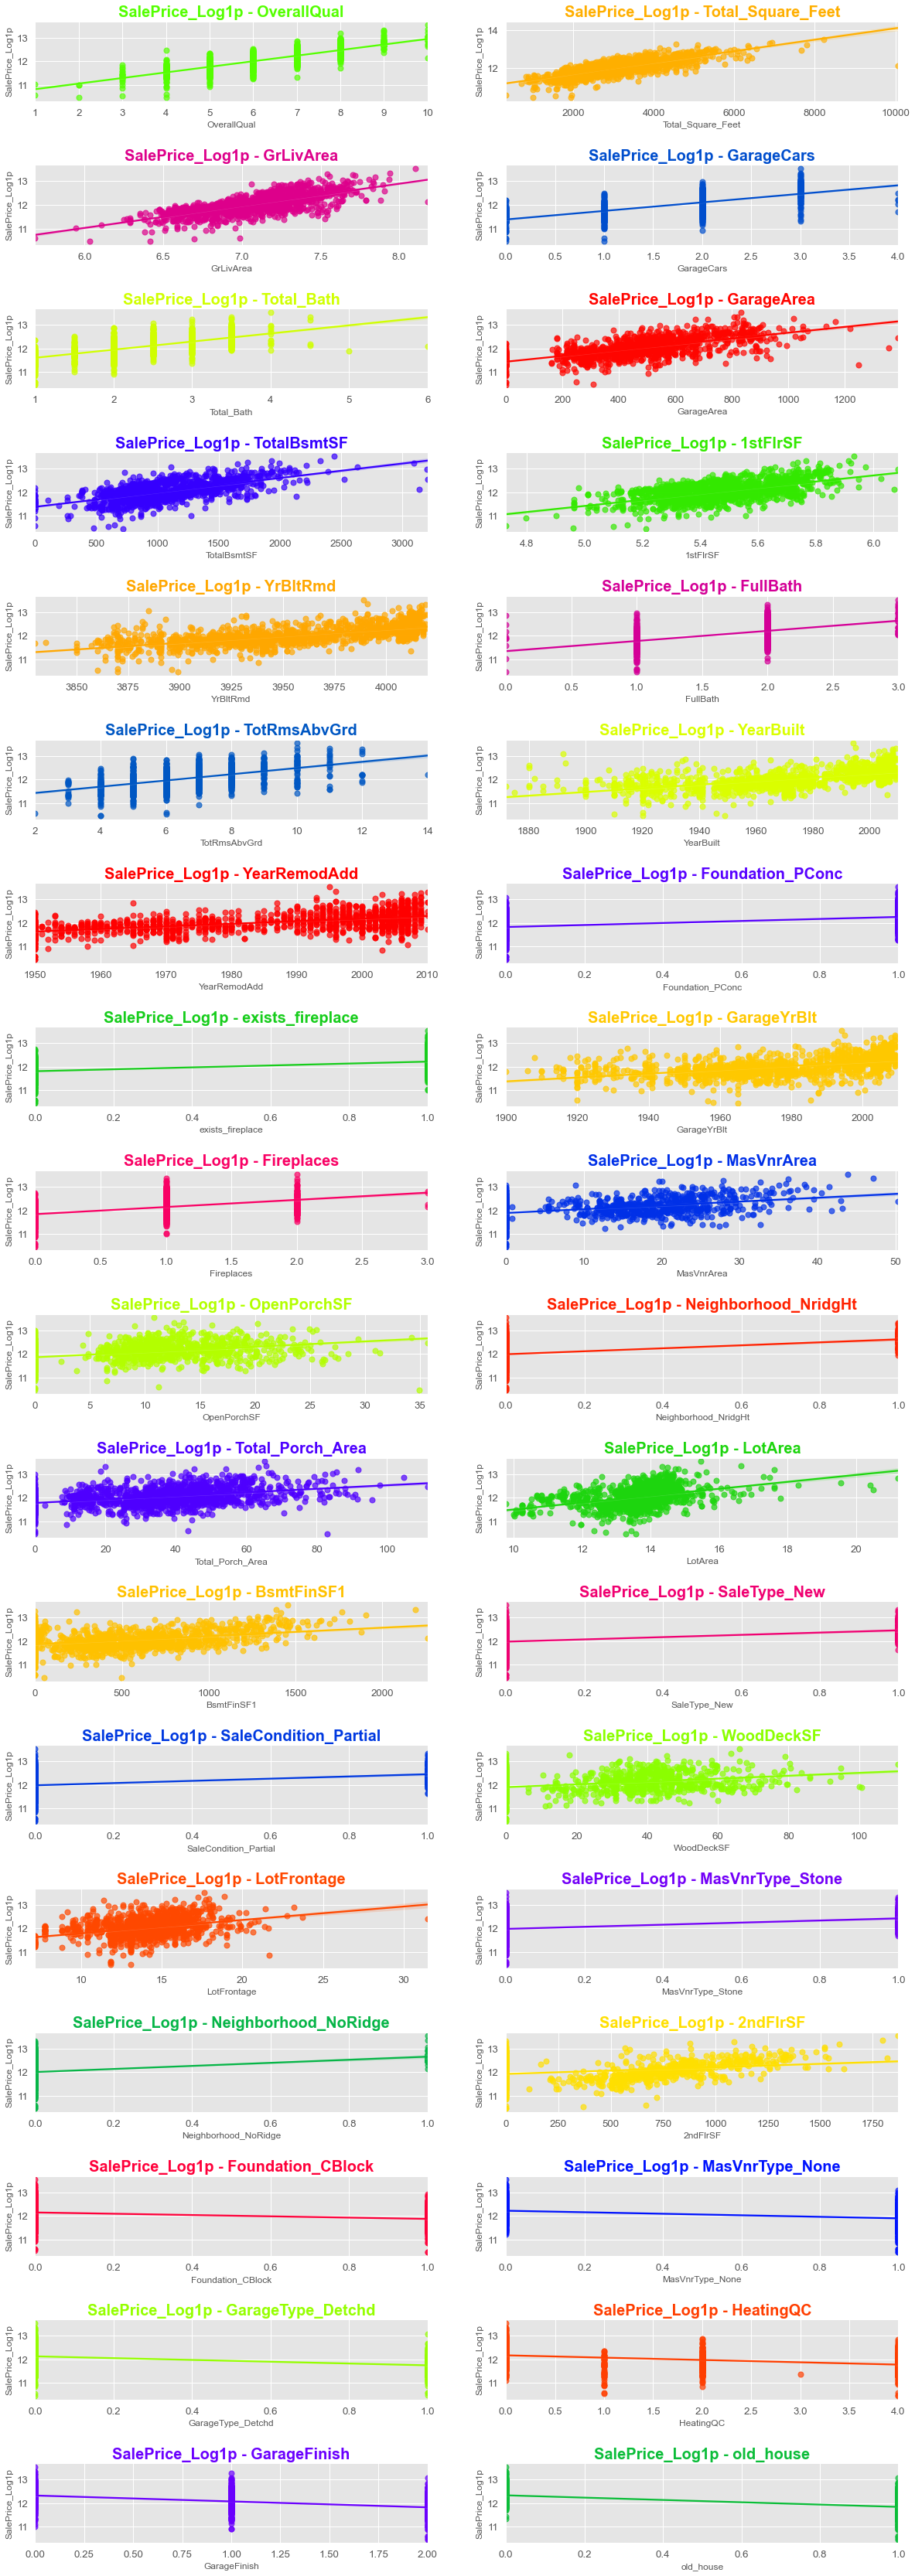

In [114]:
plt.style.use('ggplot')
fig, axes = plt.subplots(18, 2,figsize=(20,60))
fig.subplots_adjust(hspace=0.8)
sb.set(font_scale=1.2)
colors=[plt.cm.prism_r(each) for each in np.linspace(0, 1, len(best_columns))]
for i,ax,color in zip(best_columns,axes.flatten(),colors):
    sb.regplot(x=train[i], y=train["SalePrice_Log1p"], fit_reg=True,marker='o',scatter_kws={'s':50,'alpha':0.7},color=color,ax=ax)
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice_Log1p',fontsize=12)
    ax.set_title('SalePrice_Log1p'+' - '+str(i),color=color,fontweight='bold',size=20)

In [116]:
best_columns

['OverallQual',
 'Total_Square_Feet',
 'GrLivArea',
 'GarageCars',
 'Total_Bath',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'YrBltRmd',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'Foundation_PConc',
 'exists_fireplace',
 'GarageYrBlt',
 'Fireplaces',
 'MasVnrArea',
 'OpenPorchSF',
 'Neighborhood_NridgHt',
 'Total_Porch_Area',
 'LotArea',
 'BsmtFinSF1',
 'SaleType_New',
 'SaleCondition_Partial',
 'WoodDeckSF',
 'LotFrontage',
 'MasVnrType_Stone',
 'Neighborhood_NoRidge',
 '2ndFlrSF',
 'Foundation_CBlock',
 'MasVnrType_None',
 'GarageType_Detchd',
 'HeatingQC',
 'GarageFinish',
 'old_house',
 'KitchenQual',
 'ExterQual']

In [117]:
train.FullBath

0       2
1       2
2       2
3       1
4       2
5       1
6       2
7       2
8       2
9       1
10      1
11      3
12      1
13      2
14      1
15      1
16      1
17      2
18      1
19      1
20      3
21      1
22      2
23      1
24      1
25      2
26      1
27      2
28      1
29      1
30      1
31      1
32      2
33      1
34      2
35      3
36      1
37      1
38      1
39      2
40      2
41      1
42      1
43      1
44      1
45      2
46      1
47      2
48      2
49      1
50      2
51      1
52      1
53      0
54      1
55      2
56      2
57      2
58      3
59      1
60      1
61      1
62      2
63      2
64      2
65      2
66      2
67      2
68      1
69      2
70      2
71      1
72      2
73      1
74      2
75      1
76      1
77      1
78      2
79      1
80      2
81      2
82      2
83      1
84      2
85      2
86      2
87      2
88      1
89      1
90      1
91      1
92      1
93      2
94      2
95      2
96      2
97      1
98      1
99      1


In [118]:
train = train[train.GarageArea * train.GarageCars < 3700]
train = train[(train.FullBath + (train.HalfBath*0.5) + train.BsmtFullBath + (train.BsmtHalfBath*0.5))<5]

In [119]:
len(train)

1447

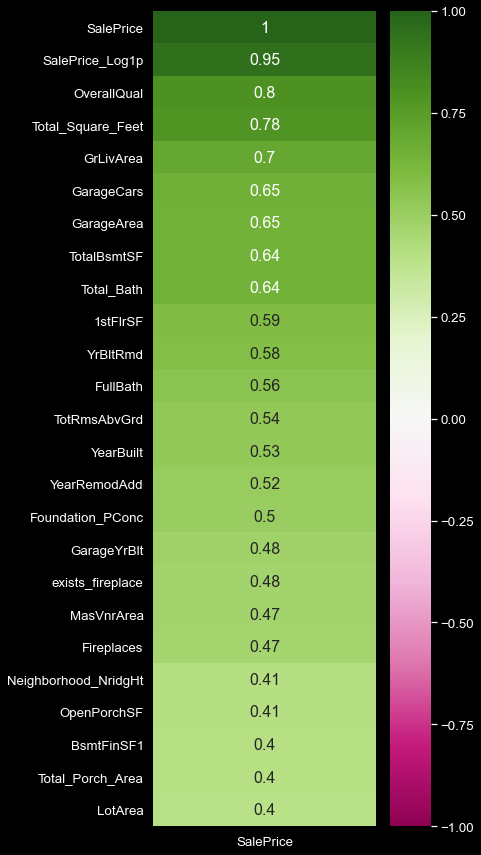

In [120]:
# 移除离群点后的相关性
plt.style.use('dark_background')
corr1_new_train=train.corr()
plt.figure(figsize=(5,15))
sb.heatmap(corr1_new_train[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(25),annot_kws={"size": 16},vmin=-1, cmap='PiYG', annot=True)
sb.set(font_scale=2)

In [121]:
train.isnull().sum()

Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
Street                   0
Alley                    0
LotShape                 0
LandSlope                0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
ExterQual                0
ExterCond                0
BsmtQual                 0
BsmtCond                 0
BsmtExposure             0
BsmtFinType1             0
BsmtFinSF1               0
BsmtFinType2             0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
HeatingQC                0
CentralAir               0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
KitchenQual              0
T

In [122]:
test.isnull().sum()

Id                          0
MSSubClass                  0
LotFrontage                 0
LotArea                     0
Street                      0
Alley                       0
LotShape                    0
LandSlope                   0
OverallQual                 0
OverallCond                 0
YearBuilt                   0
YearRemodAdd                0
MasVnrArea                  0
ExterQual                   0
ExterCond                   0
BsmtQual                    0
BsmtCond                    0
BsmtExposure                0
BsmtFinType1                0
BsmtFinSF1                  0
BsmtFinType2                0
BsmtFinSF2                  0
BsmtUnfSF                   0
TotalBsmtSF                 0
HeatingQC                   0
CentralAir                  0
1stFlrSF                    0
2ndFlrSF                    0
LowQualFinSF                0
GrLivArea                   0
BsmtFullBath                0
BsmtHalfBath                0
FullBath                    0
HalfBath  

In [123]:
del test['SalePrice']

In [125]:
# 建立模型
X=train.drop(['SalePrice','SalePrice_Log1p','Classes'],axis=1)
y=train.SalePrice_Log1p

In [134]:
# 过拟合处理
def overfit_reducer(df):
    overfit = []
    for i in df.columns:
        counts = df[i].value_counts()
        zeros = counts.iloc[0]
        if zeros / len(df) * 100 > 99.9:
            overfit.append(i)
    overfit = list(overfit)
    return overfit
overfitted_features = overfit_reducer(X)

In [135]:
overfitted_features

['PoolArea',
 'PoolQC',
 'exists_pool',
 'Utilities_AllPub',
 'Utilities_NoSeWa',
 'Condition2_PosA',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'RoofMatl_ClyTile',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'Exterior1st_AsphShn',
 'Exterior1st_CBlock',
 'Exterior1st_ImStucc',
 'Exterior2nd_CBlock',
 'Exterior2nd_Other',
 'Heating_Floor',
 'Electrical_Mix',
 'MiscFeature_TenC']

In [137]:
X.drop(overfitted_features,axis=1,inplace=True)
test.drop(overfitted_features,axis=1,inplace=True)

d:\tool\python\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [138]:
X.shape

(1447, 211)

In [139]:
test.shape

(1459, 211)

In [141]:
std_scaler=StandardScaler() # 确保每个特征的平均值为0，方差为1。
rbst_scaler=RobustScaler() # 使用中位数和四分位数（四分之一），确保每个特征的统计属性都位于同一范围。
power_transformer=PowerTransformer() # 映射到高斯分布
X_std=std_scaler.fit_transform(X)
X_rbst=rbst_scaler.fit_transform(X)
X_pwr=power_transformer.fit_transform(X)

test_std=std_scaler.transform(test)
test_rbst=rbst_scaler.transform(test)
test_pwr=power_transformer.transform(test)

d:\tool\python\lib\site-packages\numpy\core\_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [147]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.002,random_state=52)

In [149]:
import lightgbm as lgb

In [159]:
# lightgbm分类器
lgb_regressor=lgb.LGBMRegressor(objective='regression' # 目标函数
                                ,num_leaves=5 # 每棵树最多的叶子数
                                ,learning_rate=0.035 # 学习率
                                ,n_estimators=2177 # 数的数量
                                ,max_bin=50 # 为直方图算法中特征值离散化的分段数量
                                ,bagging_fraction=0.65 #  每次进行bagging时，随机使用多少的样本。
                                ,bagging_freq=5  # 每建立多少棵树，就进行一次bagging。
                                ,bagging_seed=7 
                                ,feature_fraction=0.201 # 每次新建一棵树时，随机使用多少的特征。
                                ,feature_fraction_seed=7
                                ,n_jobs=-1)

In [160]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
lgb_regressor.fit(X_train, y_train)
y_head=lgb_regressor.predict(X_test)
print('-'*10+'LGBM'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

[LightGBM] [Warning] feature_fraction is set=0.201, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.201
[LightGBM] [Warning] bagging_fraction is set=0.65, subsample=1.0 will be ignored. Current value: bagging_fraction=0.65
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
----------LGBM----------
R square Accuracy:  -0.4539197035550435
Mean Absolute Error Accuracy:  0.1802836758047229
Mean Squared Error Accuracy:  0.04087409814117413


In [155]:
from sklearn.ensemble import GradientBoostingRegressor,StackingRegressor,RandomForestRegressor,ExtraTreesRegressor

In [156]:
# 梯度提升分类器
gb_reg = GradientBoostingRegressor(n_estimators=1992
                                   , learning_rate=0.03005
                                   , max_depth=4
                                   , max_features='sqrt'
                                   , min_samples_leaf=15
                                   , min_samples_split=14
                                   , loss='huber'
                                   , random_state =42)
gb_reg.fit(X_train, y_train)
y_head=gb_reg.predict(X_test)
print('-'*10+'GBR'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

----------GBR----------
R square Accuracy:  -0.9416781756689376
Mean Absolute Error Accuracy:  0.1859830162224796
Mean Squared Error Accuracy:  0.05458647002087586


In [165]:
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeCV,LassoCV,ElasticNetCV
from sklearn.pipeline import make_pipeline # 串行工作

In [164]:
# 岭回归
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

alphas=[1e-9,1e-8,1e-7,1e-6]

ridgecv_reg= make_pipeline(RidgeCV(alphas=alphas, cv=kfolds))
ridgecv_reg.fit(X_train, y_train)
y_head=ridgecv_reg.predict(X_test)
print('-'*10+'RidgeCV'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

----------RidgeCV----------
R square Accuracy:  -0.3493805602536799
Mean Absolute Error Accuracy:  0.15602955044166222
Mean Squared Error Accuracy:  0.0379351853577197


In [166]:
kfolds = KFold(n_splits=8, shuffle=True, random_state=42)

lassocv_reg= make_pipeline(LassoCV(alphas=alphas, cv=kfolds))
lassocv_reg.fit(X_train, y_train)
y_head=lassocv_reg.predict(X_test)
print('-'*10+'LassoCV'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

d:\tool\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.010944437332662, tolerance: 0.019868613301519986
  model = cd_fast.enet_coordinate_descent_gram(
d:\tool\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.144509319491253, tolerance: 0.019868613301519986
  model = cd_fast.enet_coordinate_descent_gram(
d:\tool\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.2503225420931345, tolerance: 0.019868613301519986
  model = cd_fast.enet_coordinate_descent_gram(
d:\tool\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective di

----------LassoCV----------
R square Accuracy:  -0.362891842587044
Mean Absolute Error Accuracy:  0.1570240289505449
Mean Squared Error Accuracy:  0.038315028535273916


d:\tool\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.820099575094395, tolerance: 0.022907463337937316
  model = cd_fast.enet_coordinate_descent(


In [167]:
kfolds = KFold(n_splits=8, shuffle=True, random_state=42)

alphas=[0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006]
l1ratio=[0.87, 0.9,0.92, 0.95,0.97, 0.99, 1]

elasticv_reg= make_pipeline(ElasticNetCV(alphas=alphas, cv=kfolds, l1_ratio=l1ratio))
elasticv_reg.fit(X_train, y_train)
y_head=elasticv_reg.predict(X_test)
print('-'*10+'ElasticNetCV'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

d:\tool\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03249896344396852, tolerance: 0.020298395620600804
  model = cd_fast.enet_coordinate_descent_gram(
d:\tool\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.027567323760326445, tolerance: 0.020298395620600804
  model = cd_fast.enet_coordinate_descent_gram(
d:\tool\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.024202815829058366, tolerance: 0.020298395620600804
  model = cd_fast.enet_coordinate_descent_gram(
d:\tool\python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objec

----------ElasticNetCV----------
R square Accuracy:  -0.6767346784579318
Mean Absolute Error Accuracy:  0.1798945793757003
Mean Squared Error Accuracy:  0.04713810373187841


In [169]:
from sklearn.ensemble import StackingRegressor,ExtraTreesRegressor

In [176]:
estimators = [('lgbm', lgb_regressor),
              ('gbr', gb_reg),   
              ('lasso', lassocv_reg),   
              ('ridge', ridgecv_reg),   
              ('elasticnet', elasticv_reg)]

stack_reg=StackingRegressor(estimators=estimators
                            ,final_estimator=ExtraTreesRegressor(n_estimators=50)
                            ,n_jobs=-1)
stack_reg.fit(X_train, y_train)
y_head=stack_reg.predict(X_test)
print('-'*10+'StackingRegressor'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Mean Squared Error Accuracy: ',mean_squared_error(y_test,y_head))

----------StackingRegressor----------
R square Accuracy:  -0.09429979731615834
Mean Absolute Error Accuracy:  0.16580843773285872
Mean Squared Error Accuracy:  0.030764090480375178


In [183]:
y_head=pd.DataFrame(y_head,columns=['Predict'])
y_test.reset_index(drop=True,inplace=True)
y_test_y_head=pd.concat([y_test,y_head],axis=1)
y_test_y_head.head()

SalePrice_Log1p    Predict
0        12.072547  12.167369
1        11.767575  12.002465
2        11.681832  11.514119

In [189]:
test_pred_lgb=lgb_regressor.predict(test_pwr)
test_pred_gb=gb_reg.predict(test_pwr)
test_pred_elastic=elasticv_reg.predict(test_pwr)
test_pred_ridge=ridgecv_reg.predict(test_pwr)
test_pred_lasso=lassocv_reg.predict(test_pwr)
test_pred_stack=stack_reg.predict(test_pwr)

In [190]:
test_pred_lgb=pd.DataFrame(test_pred_lgb,columns=['SalePrice'])
test_pred_gb=pd.DataFrame(test_pred_gb,columns=['SalePrice'])
test_pred_elastic=pd.DataFrame(test_pred_elastic,columns=['SalePrice'])
test_pred_ridge=pd.DataFrame(test_pred_ridge,columns=['SalePrice'])
test_pred_lasso=pd.DataFrame(test_pred_lasso,columns=['SalePrice'])
test_pred_stack=pd.DataFrame(test_pred_stack,columns=['SalePrice'])

In [191]:
np.expm1(test_pred_lgb.SalePrice)

0       121290.010649
1       157998.341896
2       188798.987268
3       202352.022805
4       185985.736347
5       171621.720644
6       183443.795192
7       165550.379589
8       175338.213442
9       121705.858303
10      193179.984209
11       93677.198090
12       95985.830541
13      143509.235577
14      105928.098409
15      375141.139736
16      251835.728301
17      281431.167386
18      277362.732316
19      494299.372667
20      329525.624455
21      216526.847692
22      191605.086677
23      177624.737931
24      183051.451649
25      197960.930947
26      338972.933261
27      247259.043069
28      207491.467241
29      247048.746670
30      197001.485234
31       90016.883435
32      168785.884455
33      280066.758224
34      262578.991924
35      243478.777015
36      190690.714384
37      167904.257462
38      166105.593027
39      174370.365306
40      183849.509981
41      143736.517429
42      269107.414028
43      233047.265055
44      227042.830025
45      17

In [192]:
test_pred_lgb.SalePrice =np.floor(np.expm1(test_pred_lgb.SalePrice))
test_pred_gb.SalePrice =np.floor(np.expm1(test_pred_gb.SalePrice))
test_pred_elastic.SalePrice =np.floor(np.expm1(test_pred_elastic.SalePrice))
test_pred_ridge.SalePrice =np.floor(np.expm1(test_pred_ridge.SalePrice))
test_pred_lasso.SalePrice =np.floor(np.expm1(test_pred_lasso.SalePrice))
test_pred_stack.SalePrice =np.floor(np.expm1(test_pred_stack.SalePrice))

In [194]:
final_pred=(test_pred_stack*0.1665)+(test_pred_lgb*0.678)+(test_pred_ridge*0.1665)

In [195]:
final_pred.head()

SalePrice
0  125624.0205
1  159062.4855
2  191655.6630
3  205943.8380
4  193470.0570

In [196]:
sample_sub=pd.read_csv('./sample_submission.csv')

In [197]:
sample_sub.head()

Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977

In [198]:
sample_sub['SalePrice'] = final_pred

In [199]:
sample_sub.to_csv('SampleSubmissionForHousePrice.csv',index=False)